# 1. Estudio de los datos

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drinking_water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [17]:
# Comprobamos la cantidad de valores únicos en las columanas
for column in df.columns:
    print("{} \t\t {} valores únicos".format(column, len( df[column].unique() ) ))

ph 		 2786 valores únicos
Hardness 		 3276 valores únicos
Solids 		 3276 valores únicos
Chloramines 		 3276 valores únicos
Sulfate 		 2496 valores únicos
Conductivity 		 3276 valores únicos
Organic_carbon 		 3276 valores únicos
Trihalomethanes 		 3115 valores únicos
Turbidity 		 3276 valores únicos
Potability 		 2 valores únicos


In [16]:
# Comprobamos el porcentaje de valores nulos en cada columna
for column in df.columns:
    print("{} \t\t {:.1f}% valores nulos".format(column, (df[column].isnull().sum() / len(df)) * 100 ))



ph 		 15.0% valores nulos
Hardness 		 0.0% valores nulos
Solids 		 0.0% valores nulos
Chloramines 		 0.0% valores nulos
Sulfate 		 23.8% valores nulos
Conductivity 		 0.0% valores nulos
Organic_carbon 		 0.0% valores nulos
Trihalomethanes 		 4.9% valores nulos
Turbidity 		 0.0% valores nulos
Potability 		 0.0% valores nulos


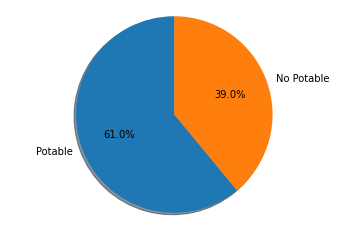

In [28]:
sizes = df['Potability'].value_counts().tolist()
labels = 'Potable', 'No Potable'

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0,0), labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90)

ax1.axis('equal')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

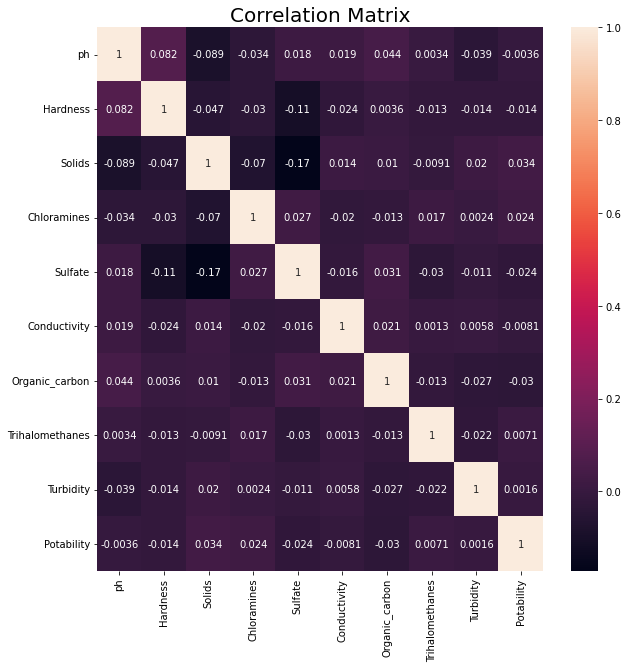

In [36]:
'''
' Matriz de correlacion
'
' Se puede observar que apenas existe correlacion entre los atributos,
' aunque la correlacion de Hardness y Solid con Sulfate es mayor que
' en el resto de atributos.
'''
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

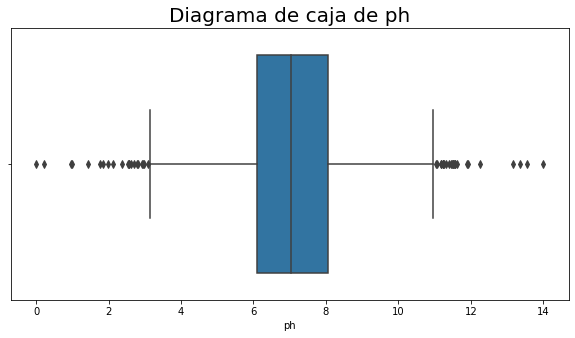

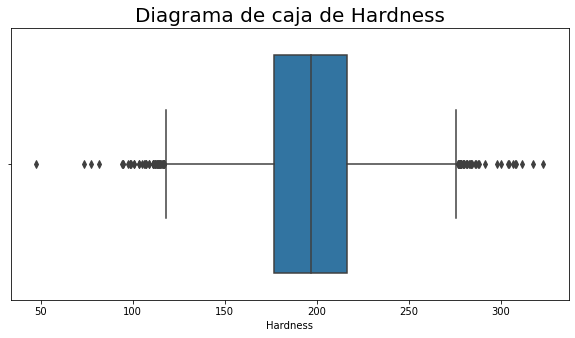

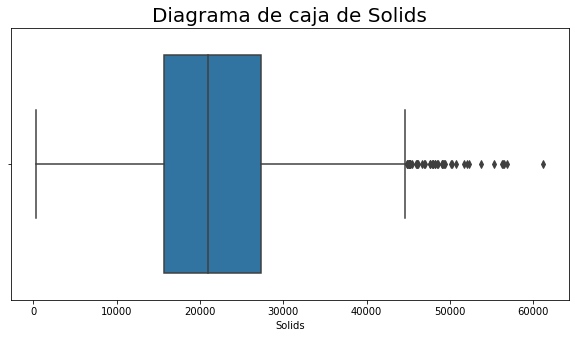

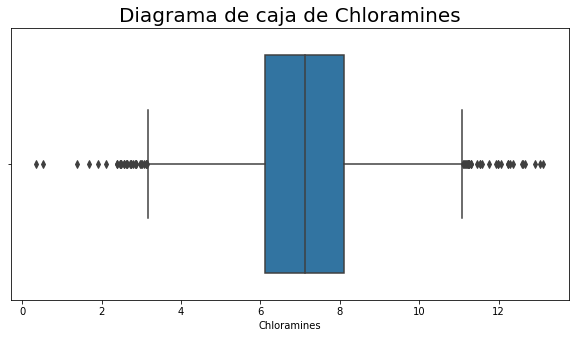

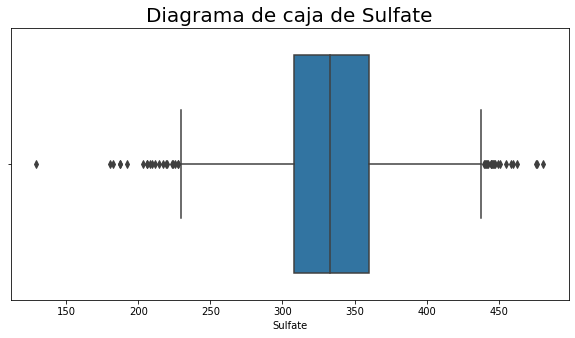

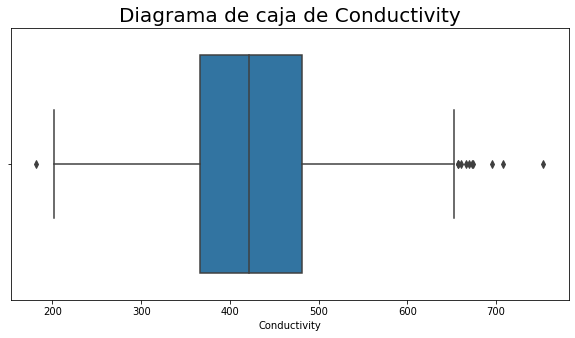

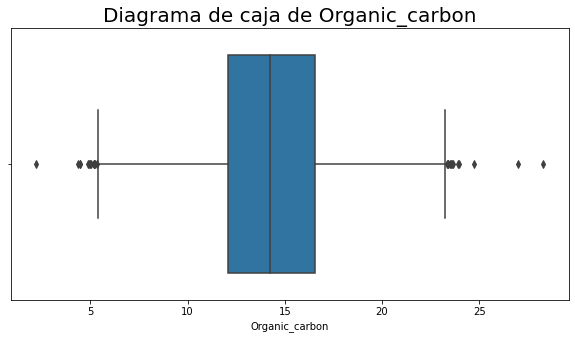

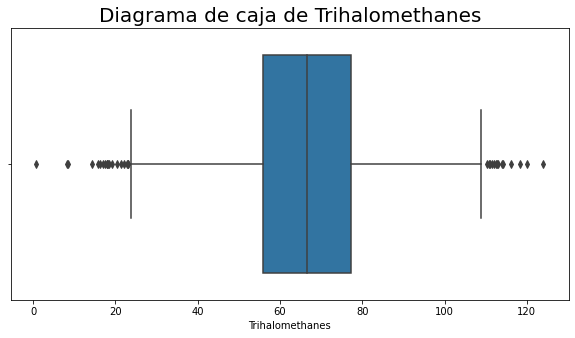

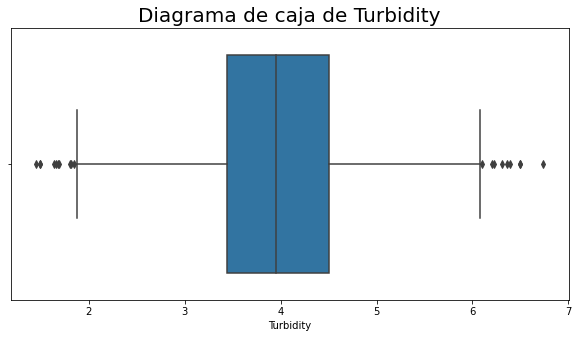

In [35]:
'''
' Diagrama de cajas
'
' En los siguientes diagramas podemos observar los valores
' atípico en los atributos. En todos los atributos pueden observarse
' que los valores atípicos se encuentran dentro del margen "normal"
' y no hay ninguno que puedan tratarse de un error.
'''
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title('Diagrama de caja: {}'.format(column), fontsize=20)



# 2. Preparacion para el modelo

In [ ]:
'''
' Valores nulos
'
' Para resolver el problema de los valores nulos vamos a sustituir
' esos valores por la media del atributo. Con el objetivo de dar un 
' valor más "realista" la sustitución del valor nulo tendrá en cuenta
' en que clase se encuentra el dato y se sustituye por el valor medio
' de la clase.
'''